# RANDOM FOREST CLASSIFIER

## 0. Imports

In [1]:
import numpy as np
import pandas as pd
from sklearn import metrics as mt
from sklearn import ensemble as en 
from matplotlib import pyplot as plt

## 1. Load Datasets

In [2]:
# Train Datasets
dataset_path = '../../datasets/classification/X_training.csv'
x_train = pd.read_csv(dataset_path)
dataset_path2 = '../../datasets/classification/y_training.csv'
y_train = pd.read_csv(dataset_path2)

# Test Datasets
dataset_path3 = '../../datasets/classification/X_test.csv'
x_test = pd.read_csv(dataset_path3)
dataset_path4 = '../../datasets/classification/y_test.csv'
y_test = pd.read_csv(dataset_path4)

# Validation Datasets
dataset_path5 = '../../datasets/classification/X_validation.csv'
x_val = pd.read_csv(dataset_path5)
dataset_path6 = '../../datasets/classification/y_validation.csv'
y_val = pd.read_csv(dataset_path6)

In [3]:
y_train = y_train.values.ravel()
y_val = y_val.values.ravel()
y_test = y_test.values.ravel()

## 2. Random Forest

### 2.1 Model Definition and Training

In [4]:
random_forest = en.RandomForestClassifier()
random_forest.fit(x_train, y_train) 

RandomForestClassifier()

### 2.2 Model Predict and Performance

In [5]:
# Predict Train
y_pred_train = random_forest.predict(x_train)

# Performance Metrics
accuracy_train = mt.accuracy_score(y_train, y_pred_train)
precision_train = mt.precision_score(y_train, y_pred_train)
recall_train = mt.recall_score(y_train, y_pred_train)
f1_score_train = mt.f1_score(y_train, y_pred_train)

print(f"Train Accuracy: {accuracy_train}")
print(f"Train Precision: {precision_train}")
print(f"Train Recall: {recall_train}")
print(f"Train F1 Score: {f1_score_train}")

Train Accuracy: 0.999986209749707
Train Precision: 1.0
Train Recall: 0.9999681812396589
Train F1 Score: 0.9999840903667171


In [6]:
# Predict Validation
y_pred_val = random_forest.predict(x_val)

# Performance Metrics
accuracy_val = mt.accuracy_score(y_val, y_pred_val)
precision_val = mt.precision_score(y_val, y_pred_val)
recall_val = mt.recall_score(y_val, y_pred_val)
f1_score_val = mt.f1_score(y_val, y_pred_val)

print(f"Validation Accuracy: {accuracy_val}")
print(f"Validation Precision: {precision_val}")
print(f"Validation Recall: {recall_val}")
print(f"Validation F1 Score: {f1_score_val}")

Validation Accuracy: 0.9648637343543872
Validation Precision: 0.975051815460198
Validation Recall: 0.9430544212636425
Validation F1 Score: 0.958786231884058


### 2.3 Fine-tuning

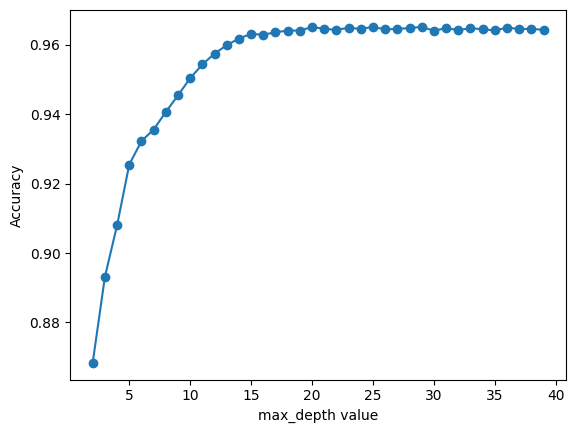

In [7]:
# Find Best max_depth Hyperparameter for Validation Data
m = np.arange(2, 40, 1)
accuracy_list = []

for i in m:
    random_forest = en.RandomForestClassifier(max_depth=i)
    random_forest.fit(x_train, y_train)
    y_pred_val = random_forest.predict(x_val)

    accuracy = mt.accuracy_score(y_val, y_pred_val)
    accuracy_list.append(accuracy)

plt.plot(m, accuracy_list, '-o')
plt.xlabel('max_depth value')
plt.ylabel('Accuracy')
plt.show();

In [8]:
best_m = accuracy_list.index(max(accuracy_list))
m[best_m]

25

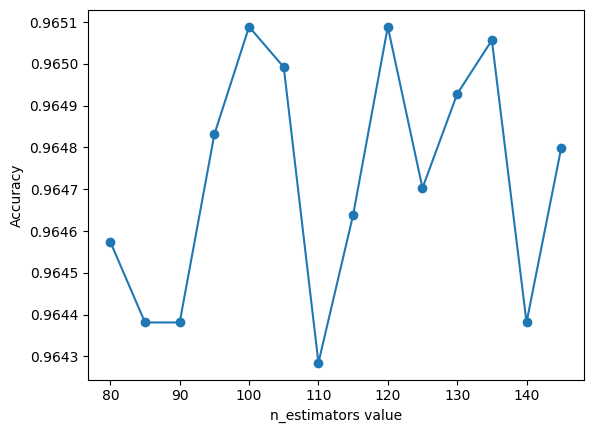

In [9]:
# Find Best n_estimators Hyperparameter for Validation Data
e = np.arange(80, 150, 5)
accuracy_estimators_list = []

for i in e:
    random_forest = en.RandomForestClassifier(n_estimators=i, max_depth=33)
    random_forest.fit(x_train, y_train)
    y_pred_val = random_forest.predict(x_val)

    accuracy_estimators = mt.accuracy_score(y_val, y_pred_val)
    accuracy_estimators_list.append(accuracy_estimators)

plt.plot(e, accuracy_estimators_list, '-o')
plt.xlabel('n_estimators value')
plt.ylabel('Accuracy')
plt.show();

In [10]:
best_e = accuracy_estimators_list.index(max(accuracy_estimators_list))
e[best_e]

100

In [11]:
# Predict Validation with Best Hyperparameters Found
random_forest = en.RandomForestClassifier(n_estimators=110, max_depth=33)
random_forest.fit(x_train, y_train) 
y_pred_val = random_forest.predict(x_val)

# Performance Metrics
accuracy_val = mt.accuracy_score(y_val, y_pred_val)
precision_val = mt.precision_score(y_val, y_pred_val)
recall_val = mt.recall_score(y_val, y_pred_val)
f1_score_val = mt.f1_score(y_val, y_pred_val)

print(f"Validation Accuracy: {accuracy_val}")
print(f"Validation Precision: {precision_val}")
print(f"Validation Recall: {recall_val}")
print(f"Validation F1 Score: {f1_score_val}")

Validation Accuracy: 0.9643167412078896
Validation Precision: 0.9730557256582976
Validation Recall: 0.943796866879501
Validation F1 Score: 0.9582029924999058


In [12]:
# Predict Test with Best Hyperparameters Found
random_forest = en.RandomForestClassifier(n_estimators=110, max_depth=33)
random_forest.fit(x_train, y_train) 
y_pred_test = random_forest.predict(x_test)

# Performance Metrics
accuracy_test = mt.accuracy_score(y_test, y_pred_test)
precision_test = mt.precision_score(y_test, y_pred_test)
recall_test = mt.recall_score(y_test, y_pred_test)
f1_score_test = mt.f1_score(y_test, y_pred_test)

print(f"Test Accuracy: {accuracy_test}")
print(f"Test Precision: {precision_test}")
print(f"Test Recall: {recall_test}")
print(f"Test F1 Score: {f1_score_test}")

Test Accuracy: 0.9638512339242267
Test Precision: 0.9726275718299646
Test Recall: 0.9442146942366916
Test F1 Score: 0.9582105545137959
